In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("all_data.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


In [3]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
df.columns = ['country', 'year', 'life_expectancy', 'gdp']

In [5]:
df.describe()

,year,life_expectancy,gdp
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [8]:
df.country.nunique()

6

In [10]:
print("The average life expectancy per country is")
print(df.groupby('country').life_expectancy.mean())
print("The average life expectancy per year is")
print(df.groupby('year').life_expectancy.mean())
print("The average gdp per country is")
print(df.groupby('country').gdp.mean())

The average life expectancy per country is
country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: life_expectancy, dtype: float64
The average life expectancy per year is
year
2000    70.766667
2001    70.833333
2002    70.950000
2003    71.033333
2004    71.300000
2005    71.483333
2006    71.950000
2007    72.300000
2008    72.666667
2009    73.066667
2010    73.483333
2011    74.200000
2012    74.600000
2013    74.966667
2014    75.316667
2015    75.716667
Name: life_expectancy, dtype: float64
The average gdp per country is
country
Chile                       1.697888e+11
China                       4.957714e+12
Germany                     3.094776e+12
Mexico                      9.766506e+11
United States of America    1.407500e+13
Zimbabwe                    9.062580e+09
Name: gdp, dtype: float64


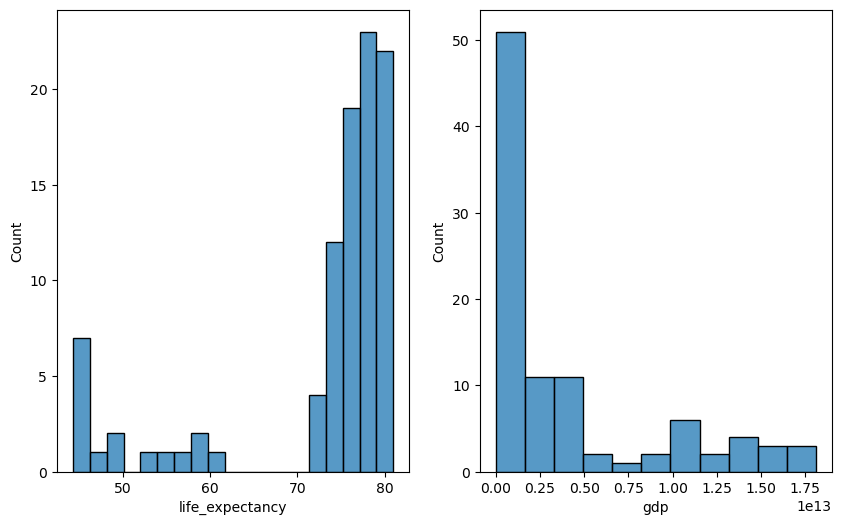

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.histplot(x='life_expectancy', data=df)
plt.subplot(1,2,2)
sns.histplot(x='gdp', data=df)
plt.show()
plt.clf()

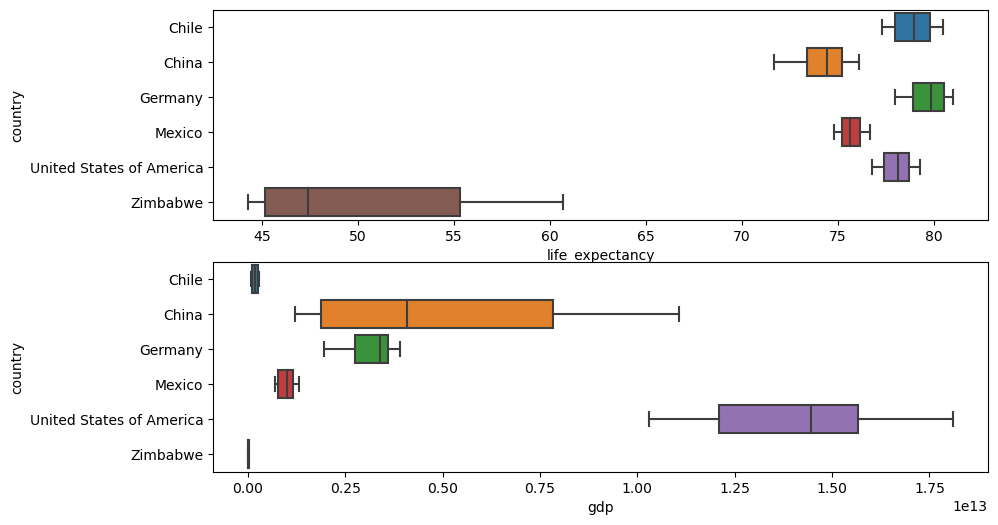

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure(figsize = (10,6))
plt.subplot(2,1,1)
sns.boxplot(x='life_expectancy', data=df, y='country')
plt.subplot(2,1,2)
sns.boxplot(x='gdp', data=df, y='country')
plt.show()
plt.clf()

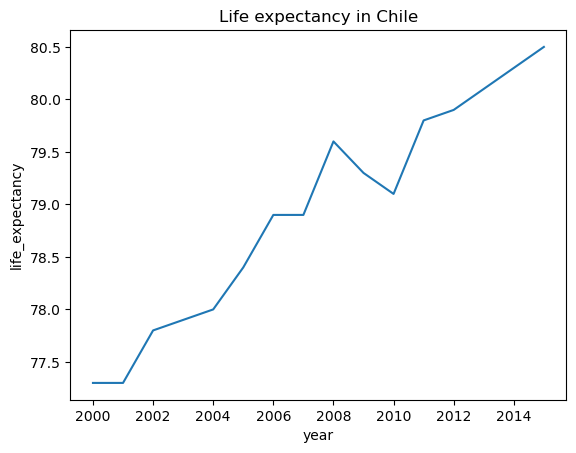

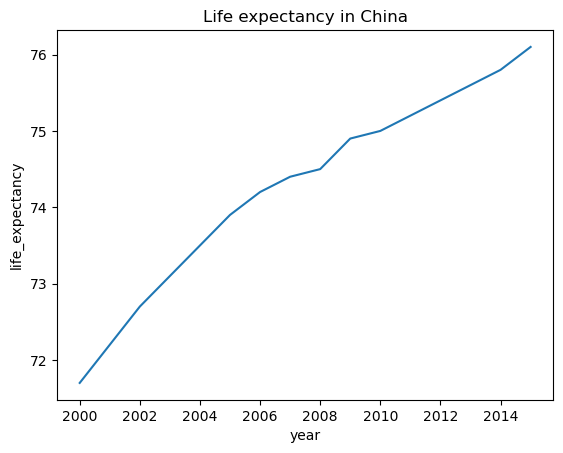

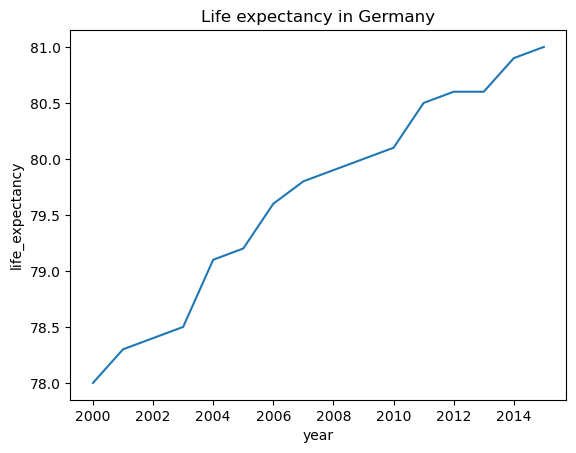

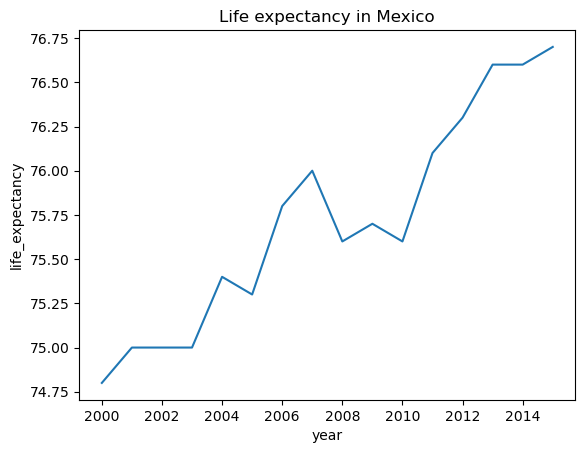

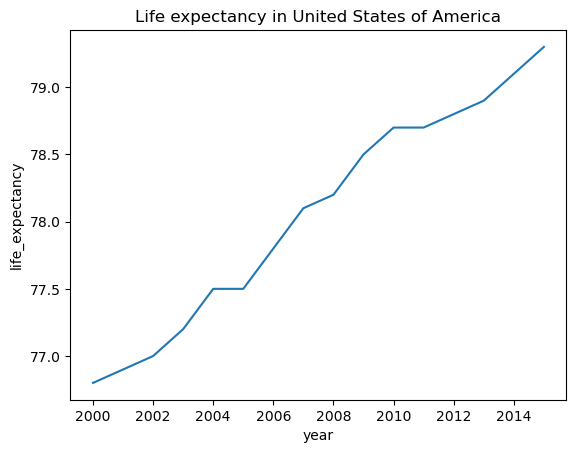

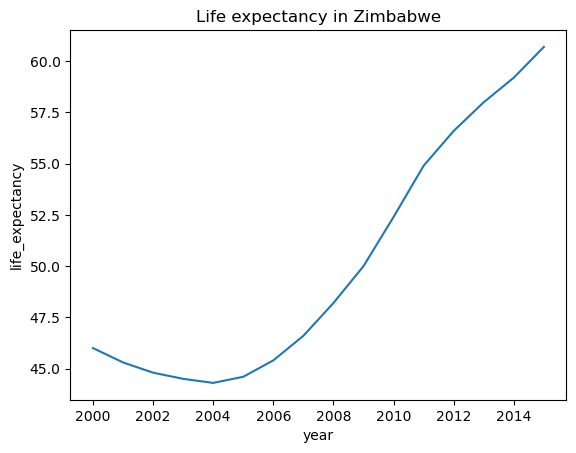

<Figure size 640x480 with 0 Axes>

In [26]:
for country in df.country.unique():
    country_df = df[df.country == country]
    sns.lineplot(x='year', y='life_expectancy', data = country_df)
    plt.title("Life expectancy in " + country)
    plt.show()
    plt.clf()

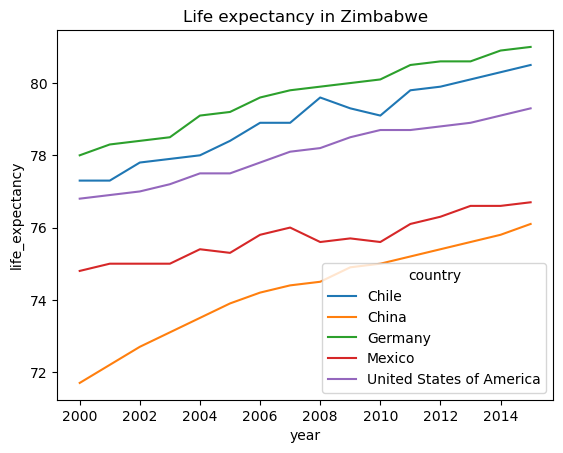

<Figure size 640x480 with 0 Axes>

In [29]:
not_zimbabwe = df[df.country != 'Zimbabwe']
sns.lineplot(x='year', y='life_expectancy', data=not_zimbabwe, hue='country')
plt.title("Life expectancy in " + country)
plt.show()
plt.clf()

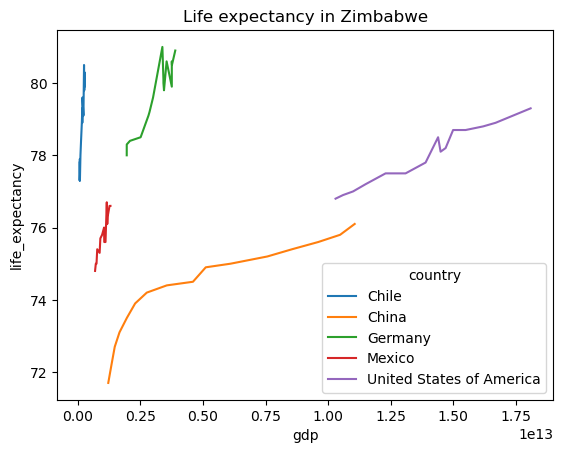

<Figure size 640x480 with 0 Axes>

In [31]:
sns.lineplot(x='gdp', y='life_expectancy', data=not_zimbabwe, hue='country')
plt.title("Life expectancy in " + country)
plt.show()
plt.clf()

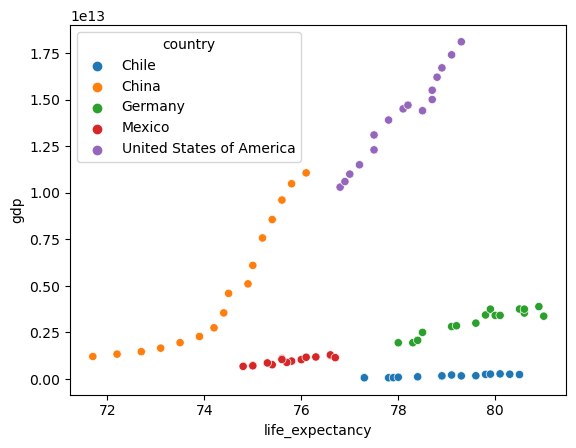

<Figure size 640x480 with 0 Axes>

In [33]:
sns.scatterplot(x='life_expectancy', y='gdp', data = not_zimbabwe, hue='country')
plt.show()
plt.clf()